# Importing the libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [3]:

pd.set_option('display.max_columns', None)

In [4]:
## Reading the file
df= pd.read_csv('Letterbox Movie Classification Dataset.csv')

# Exploring the data

In [5]:
df.head(5)

,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.57,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.18,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.93,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.79,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.28,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721


In [6]:
df.isnull().sum()

Unnamed: 0           0
Film_title           0
Director             0
Average_rating       0
Genres               0
Runtime              0
Original_language    0
Description          0
Studios              0
Watches              0
List_appearances     0
Likes                0
Fans                 0
Lowest★              0
Medium★★★            0
Highest★★★★★         0
Total_ratings        0
dtype: int64

In [7]:
df.info()
## all columns does not have null values and the data types are valid for all

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   Film_title         10000 non-null  object 
 2   Director           10000 non-null  object 
 3   Average_rating     10000 non-null  float64
 4   Genres             10000 non-null  object 
 5   Runtime            10000 non-null  float64
 6   Original_language  10000 non-null  object 
 7   Description        10000 non-null  object 
 8   Studios            10000 non-null  object 
 9   Watches            10000 non-null  int64  
 10  List_appearances   10000 non-null  int64  
 11  Likes              10000 non-null  int64  
 12  Fans               10000 non-null  int64  
 13  Lowest★            10000 non-null  int64  
 14  Medium★★★          10000 non-null  int64  
 15  Highest★★★★★       10000 non-null  int64  
 16  Total_ratings      1000

In [8]:
df.nunique()
## to know how many dictinct values are in each column

Unnamed: 0           10000
Film_title            9665
Director              4762
Average_rating         327
Genres                2397
Runtime                301
Original_language       57
Description           9963
Studios               8016
Watches               8794
List_appearances      7887
Likes                 6741
Fans                   963
Lowest★               3086
Medium★★★             6370
Highest★★★★★          4699
Total_ratings         8338
dtype: int64

In [9]:
df.duplicated().sum()
## the data has no duplicates

np.int64(0)

# Cleaning the data

In [10]:
df.columns

Index(['Unnamed: 0', 'Film_title', 'Director', 'Average_rating', 'Genres',
       'Runtime', 'Original_language', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', 'Lowest★', 'Medium★★★',
       'Highest★★★★★', 'Total_ratings'],
      dtype='object')

In [11]:
## rename the columns
df.columns= ['Unnamed: 0', 'Film_title', 'Director', 'Average_rating', 'Genres',
       'Runtime', 'Original_language', 'Description', 'Studios', 'Watches',
       'List_appearances', 'Likes', 'Fans', 'Lowest', 'Medium',
       'Highest', 'Total_ratings']

In [12]:
## drop columns will not be used
df.drop(['Unnamed: 0','Description'] , axis=1, inplace= True)

In [13]:
df.sample(2)

,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Studios,Watches,List_appearances,Likes,Fans,Lowest,Medium,Highest,Total_ratings
4373,Mishima: A Life in Four Chapters,Paul Schrader,4.42,['Drama'],121.0,Japanese,"['Lucasfilm Ltd.', 'American Zoetrope', 'Filml...",111781,68396,47653,4000,185,4108,30133,84030
6029,Sausage Party,"Greg Tiernan, Conrad Vernon",2.27,"['Adventure', 'Fantasy', 'Comedy', 'Animation']",88.0,English,"['Columbia Pictures', 'Annapurna Pictures', 'P...",793682,41747,68780,371,57949,86110,13094,450581


# Data analysis and visualization

In [ ]:
# Making an identity for the Project
custom_palette = ['#4E79A7', '#F28E2B', '#59A14F', '#E15759', '#B07AA1', '#9D7660', '#EDC949']
sns.set_palette(custom_palette)

In [50]:
## Top 10 Directors by Average Rating
Top10_directors= df.groupby('Director')['Average_rating'].max().sort_values(ascending = False).head(10).reset_index()

In [67]:
	
fig= px.bar(
    Top10_directors, x= 'Director', y= 'Average_rating', 
    title = 'Top 10 director by average rating', 
    color='Average_rating', text= 'Average_rating', color_continuous_scale=custom_palette)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, width=600, height=600)
fig
# David Branard the director whos film has the highest average rate

In [16]:
## Number of films directed by each director
director_count = df['Director'].value_counts().head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

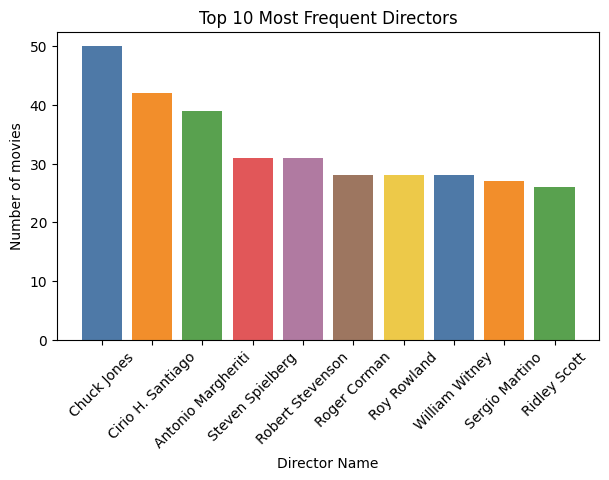

In [64]:
plt.figure(figsize=(7,4))
plt.bar(director_count.index, director_count.values, color= custom_palette)
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Director Name')
plt.ylabel('Number of movies')
plt.xticks(rotation= 45)
plt.tight_layout
plt.show
# Chuck Jones the director who directed the highest number of films

In [70]:
## Top 10 Films by Average Rating	
Top10_directors= df.groupby('Film_title')['Average_rating'].max().sort_values(ascending = False).head(10).reset_index()

In [ ]:
fig= px.bar(
    Top10_directors, x= 'Film_title', y= 'Average_rating', 
    title = 'Top 10 films by average rating', 
    color='Average_rating', text= 'Average_rating', color_continuous_scale=custom_palette)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, width=600, height=650)
fig.show()
# Radiohead: In Rainbows - From the Basement has the highest avrega rate (4.71)

In [ ]:
fig= px.histogram(df, x='Average_rating', nbins=30, title='Rating Distribution')
fig.update_layout( width=600, height=400)
# the average rating from 3.2 to 3.39

In [21]:
## Most Watched Films	
top10_watches = df.groupby('Film_title')['Watches'].max().sort_values(ascending = False).head(10).reset_index()

In [ ]:
fig1= px.bar(top10_watches,x= 'Film_title', y= 'Watches',
        title = 'top 10 films watched',
        color = 'Watches', text= 'Watches', color_continuous_scale=custom_palette)
fig1.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig1.update_layout(xaxis_tickangle=45, width=600, height=650)
fig1 
# Barbie is the movie with the most watches.

In [ ]:
df[df['Film_title']== 'Parasite']

,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Studios,Watches,List_appearances,Likes,Fans,Lowest,Medium,Highest,Total_ratings
4822,Parasite,Charles Band,2.40,"['Science Fiction', 'Horror']",85.0,English,Unknown,3653,3841,467,4,263,542,36,2602
7553,Parasite,Bong Joon Ho,4.55,"['Comedy', 'Thriller', 'Drama']",133.0,Korean,['Barunson E&A'],5015041,653081,2730813,121000,7857,133796,2010363,3800561


In [24]:
## Most liked Films	
top10_likes= df.groupby('Film_title')['Likes'].max().sort_values(ascending = False).head(10).reset_index()

C:\Users\gamea\AppData\Local\Temp\ipykernel_732\254803853.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




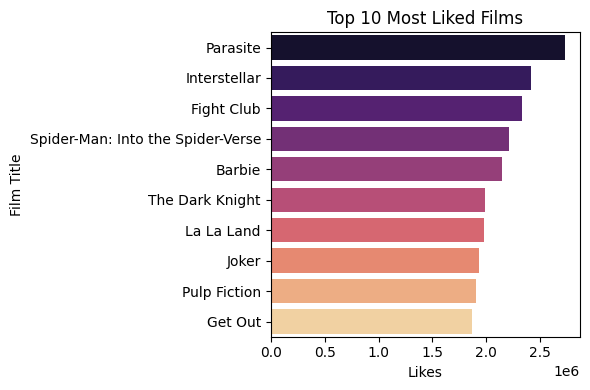

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=top10_likes, x='Likes', y='Film_title', palette='magma')  
plt.title('Top 10 Most Liked Films')
plt.xlabel('Likes')
plt.ylabel('Film Title')
plt.tight_layout()
plt.show()
# Parasite (Korean) is the movie with the most watches.

In [79]:
## Most Followed Films (Fans)	
top_fans = df[['Film_title', 'Fans']].sort_values(by='Fans', ascending=False).head(10)

In [ ]:
fig2= px.scatter(top_fans, x= 'Film_title', y= 'Fans', 
                 size= 'Fans', title= 'Most Followed Films', 
                 color = 'Film_title')

fig2.update_layout(showlegend=False, width= 600, height= 650)
fig2.show()
# Interstellar is the movie with the most followed (326000).

In [28]:
## Films with High Ratings and High Watches	
high_rating_watches = df[
    (df['Average_rating'] >= 4.0) &
    (df['Watches'] >= 1000000)
]

In [ ]:
fig3 = px.scatter(
    high_rating_watches,
    x='Watches',
    y='Average_rating',
    size='Likes', 
    hover_name='Film_title',
    title='Films by Rating and Number of Watches',
    color='Average_rating',
    color_continuous_scale=custom_palette
)
fig3.update_layout(width=900, height=600)
fig3.show()
# Parasite is the movie with the highest average rate (4.55).

In [ ]:
# Checking if Genres column type is list or not (False)
is_list = isinstance(df.loc[0, 'Genres'], list)
print(is_list) 

False


In [ ]:
# Transforming the string values into list to get it ready for get dummies
import ast

def try_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except:
        return x 
df['Genres'] = df['Genres'].apply(try_eval)

In [32]:
df.sample(1)

,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Studios,Watches,List_appearances,Likes,Fans,Lowest,Medium,Highest,Total_ratings
7737,Murder Mystery,Kyle Newacheck,2.72,"[Action, Comedy, Mystery]",97.0,English,"['Vinson Films', 'Endgame Entertainment', 'Tow...",601820,40281,73707,535,16248,100494,18223,366263


In [ ]:
# getting each genre in a separate column
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df['Genres']), columns=mlb.classes_)

df = df.join(genre_dummies)

In [34]:
df.sample(1)

,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Studios,Watches,List_appearances,Likes,Fans,Lowest,Medium,Highest,Total_ratings,Action,Adventure,Animation,Captivating vision and Shakespearean drama,Comedy,Crime,Documentary,Drama,Epic adventure and breathtaking battles,Epic heroes,Epic history and literature,Family,Fantasy,"Fantasy adventure, heroism, and swordplay",Historical battles and epic heroism,History,Horror,Music,Mystery,Romance,Science Fiction,Show All…,Superheroes in action-packed battles with villains,TV Movie,Thriller,U,War,Western,k,n,o,w
1841,Rabid Dogs,Mario Bava,3.75,"[Thriller, Crime]",96.0,Italian,"['Spera Cinematografica', 'International Media...",10969,6446,3197,39,34,1013,761,7881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [35]:
df.columns

Index(['Film_title', 'Director', 'Average_rating', 'Genres', 'Runtime',
       'Original_language', 'Studios', 'Watches', 'List_appearances', 'Likes',
       'Fans', 'Lowest', 'Medium', 'Highest', 'Total_ratings', 'Action',
       'Adventure', 'Animation', 'Captivating vision and Shakespearean drama',
       'Comedy', 'Crime', 'Documentary', 'Drama',
       'Epic adventure and breathtaking battles', 'Epic heroes',
       'Epic history and literature', 'Family', 'Fantasy',
       'Fantasy adventure, heroism, and swordplay',
       'Historical battles and epic heroism', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Show All…',
       'Superheroes in action-packed battles with villains', 'TV Movie',
       'Thriller', 'U', 'War', 'Western', 'k', 'n', 'o', 'w'],
      dtype='object')

In [82]:
# Deleting genre column with are no valid or common
df.drop(['Captivating vision and Shakespearean drama', 'Epic adventure and breathtaking battles', 'Epic heroes', 'Epic history and literature','Historical battles and epic heroism',
         'Show All…', 'Superheroes in action-packed battles with villains', 'U', 'k', 'n', 'o', 'w', 'Fantasy adventure, heroism, and swordplay'], axis=1, inplace= True, errors='ignore')

In [37]:
Valied_genres = ['Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

In [ ]:
# # How many times each genre was repeated?
genres_count= df[Valied_genres].sum().sort_values(ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

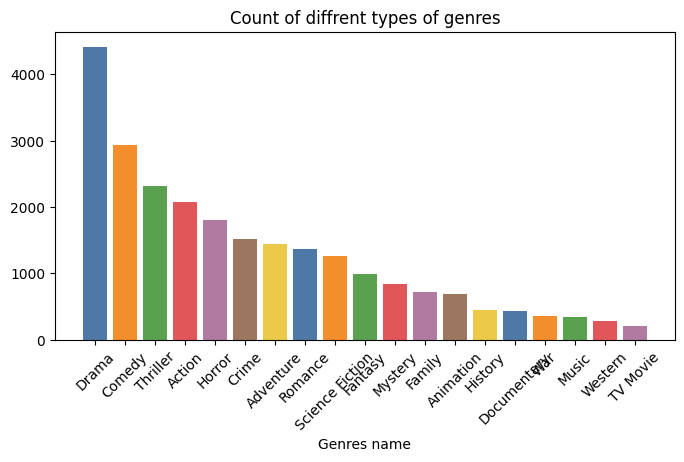

In [ ]:
plt.figure(figsize= (8,4))
plt.bar(genres_count.index, genres_count.values, color= custom_palette)
plt.title('Count of diffrent types of genres')
plt.xlabel('Genres name')
plt.xticks(rotation= 45)
plt.tight_layout
plt.show
# the Drama genre was the highest repeated one

In [83]:
## Most genres are repeated together

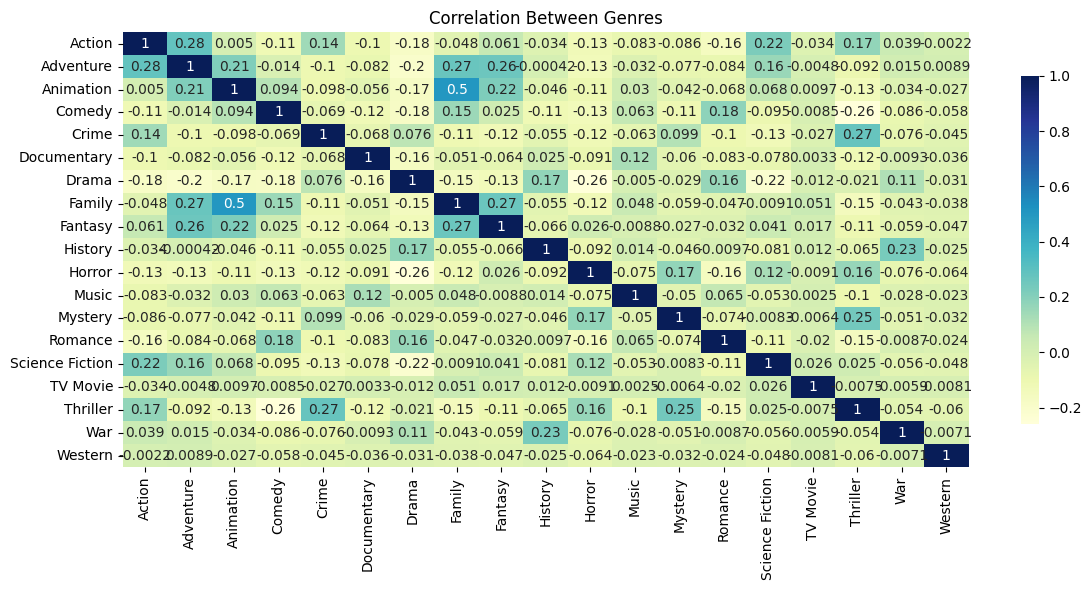

In [ ]:
genre_corr = df[Valied_genres].corr()
plt.figure(figsize= (12,6))
sns.heatmap(genre_corr , cmap='YlGnBu', annot=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Between Genres')
plt.tight_layout()
plt.show()
# from correlation; animation and family are most repeated together (0.5)

In [ ]:
## Known Studios with Most Films
# Removig the unknown values	
Studio_filtered = df[df['Studios'] != 'Unknown'] 
count_studios= Studio_filtered['Studios'].value_counts().sort_values(ascending= False).head(10)

In [99]:
fig4= px.pie(names= count_studios.index, values= count_studios.values, title='Studios by Number of Films',
    color_discrete_sequence=custom_palette)
fig4.update_traces(textinfo='percent') 
fig4.update_layout(width= 600, height = 400)
fig4.show()
# ['Metro-Goldwyn-Mayer'] is the most one with 112 value

In [44]:
## Top Languages by Film Count
Top_language= df['Original_language'].value_counts().sort_values(ascending = False).head(15)

In [ ]:
fig5= px.pie(names = Top_language.index, values= Top_language.values, title= 'Top languages',
              color_discrete_sequence= custom_palette)
fig5.update_traces(textinfo= 'percent')
fig5.update_layout(height = 500, width= 600)
fig5.show()
# English is the most frequently repeated language at 82.2%.

In [46]:
## Languages with Highest Avg Rating

In [47]:
highest_avg_lang= df.groupby('Original_language')['Average_rating'].max().sort_values(ascending= False).head(10)
highest_avg_lang

Original_language
English               4.71
Japanese              4.69
Russian               4.63
Korean                4.55
Portuguese            4.54
Chinese               4.54
French                4.51
Italian               4.50
Swedish               4.48
No spoken language    4.43
Name: Average_rating, dtype: float64

In [48]:
## Correlation between Runtime, Rating, and Watches
corr= df[['Runtime', 'Average_rating', 'Watches']].corr()
corr

,Runtime,Average_rating,Watches
Runtime,1.000000,0.186539,0.145699
Average_rating,0.186539,1.000000,0.248686
Watches,0.145699,0.248686,1.000000


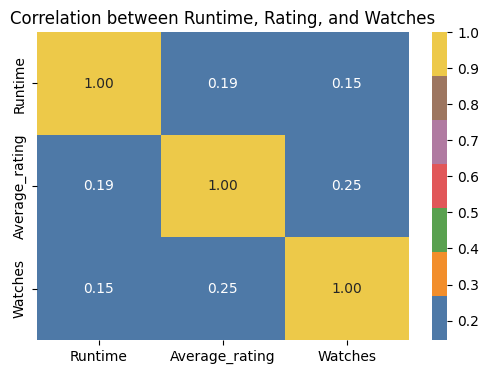

In [ ]:
plt.figure(figsize= (6,4))
sns.heatmap(corr, annot = True, cmap=custom_palette, fmt=".2f")
plt.title('Correlation between Runtime, Rating, and Watches')
plt.show()
# there is a slight relation between watches and average rating

# Conclusion

This analysis explored a dataset of 10,000 films with a focus on audience engagement, genre popularity, and production trends. The following key insights were discovered:

- **Drama and Documentary** genres are the most frequent and also among the most watched, indicating strong audience interest in emotional and factual storytelling.
- **Documentaries and Biographies** received a high number of views and likes compared to other genres, suggesting a trend toward realistic and informative content.
- Some production studios appear frequently in the dataset but do not always correlate with high audience engagement, which may reflect quantity over quality in content production.
- English-language films dominate the dataset, which aligns with global market trends and platform accessibility.
- Genres like **Comedy, Action, and Romance** have strong engagement in terms of views, likes, and fan following, proving their appeal to broad audiences.

Overall, the dataset reveals patterns in genre popularity and studio activity that could be useful for content strategy, recommendation engines, or understanding viewer preferences in film platforms.


In [101]:
!jupyter nbconvert --to html Films.ipynb

[NbConvertApp] Converting notebook Films.ipynb to html
C:\Users\gamea\AppData\Local\Programs\Python\Python312\Lib\site-packages\nbformat\__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
C:\Users\gamea\AppData\Local\Programs\Python\Python312\share\jupyter\nbconvert\templates\base\display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 839742 bytes to Films.html
